In [4]:
#https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=bfdd607fcf10c6d7f6abb81bbedab39bea0d71f2cf981ff91e7572c8328b6c55
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [7]:
from apyori import apriori

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

In [9]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [10]:
df[df['Member_number']==1808]

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
4355,1808,04-02-2015,long life bakery product
9090,1808,29-11-2014,meat
11488,1808,15-12-2014,sugar
16149,1808,21-07-2015,rolls/buns
20504,1808,04-02-2015,semi-finished bread
25239,1808,29-11-2014,whole milk
27637,1808,15-12-2014,citrus fruit
36088,1808,21-07-2015,candy
38731,1808,15-12-2014,napkins


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


<Axes: >

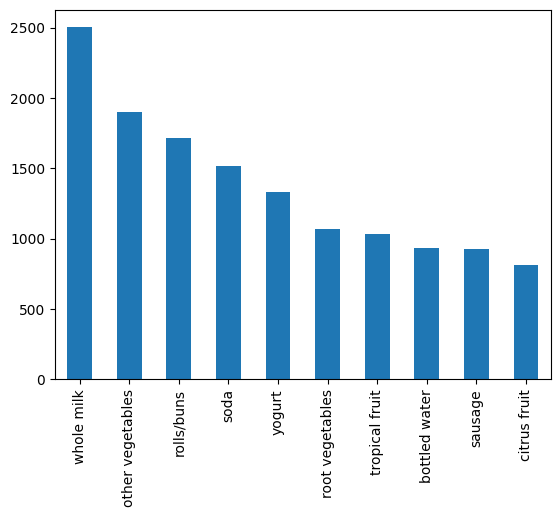

In [12]:
## Q1 - which of the following are the top 10 selling items?
df.itemDescription.value_counts().head(10).plot.bar()

<Axes: >

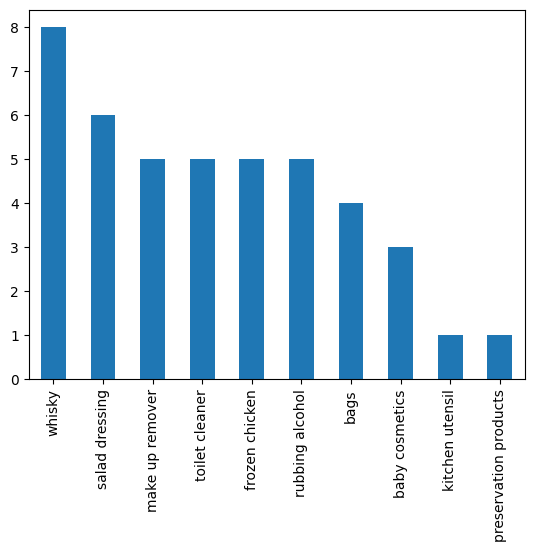

In [13]:
## Q1 - which of the following are the least 10 selling items?
df.itemDescription.value_counts().tail(10).plot.bar()

<Axes: >

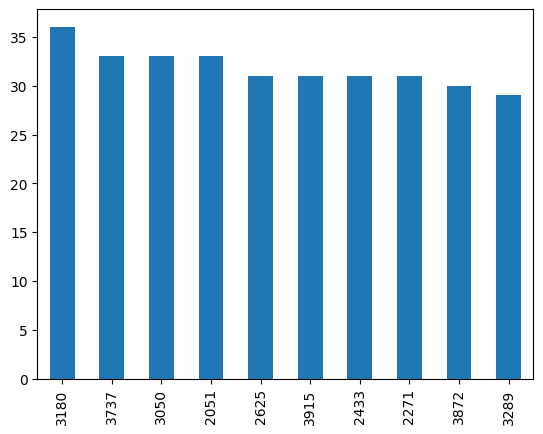

In [14]:
### top 10 customers
df.Member_number.value_counts().head(10).plot.bar()

In [15]:
### get year, month, day column from date column
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

<ipython-input-15-e64312a6f845>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['year'] = pd.DatetimeIndex(df['Date']).year
<ipython-input-15-e64312a6f845>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['month'] = pd.DatetimeIndex(df['Date']).month
<ipython-input-15-e64312a6f845>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['day'] = pd.DatetimeIndex(df['Date']).day


In [16]:
df.head()

,Member_number,Date,itemDescription,year,month,day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


<Axes: >

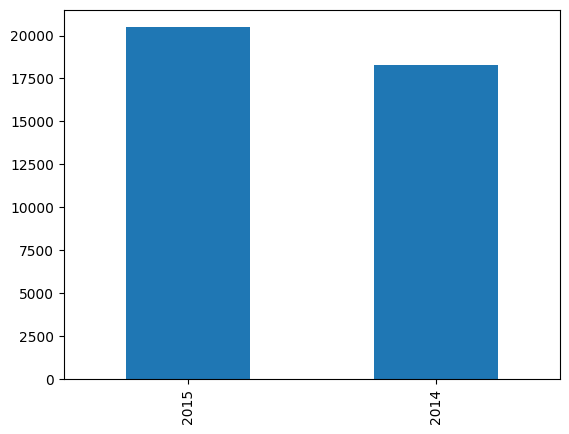

In [17]:
## q3 - in which year, majority of transactions happened?
df.year.value_counts().head(10).plot.bar()

<Axes: >

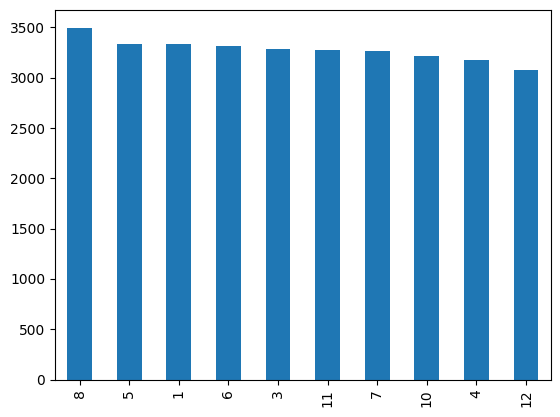

In [18]:
## q3 - in which month, majority of transactions happened?
df.month.value_counts().head(10).plot.bar()

<Axes: >

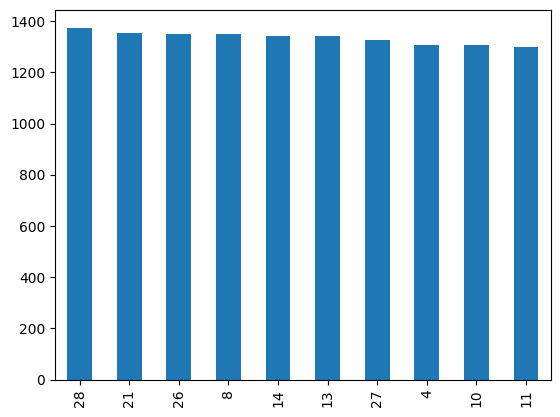

In [19]:
## q5 - in which day, majority of transactions happened?
df.day.value_counts().head(10).plot.bar()

In [20]:
#### in year 2015, which month is having highest sale?
df[df.year == 2015]['month'].value_counts()

8     1963
1     1829
3     1792
6     1791
11    1777
5     1710
4     1666
10    1663
7     1645
9     1613
12    1554
2     1485
Name: month, dtype: int64

In [21]:
data = df.copy()

In [22]:
data  = pd.get_dummies(data['itemDescription'])

In [23]:
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data1 = df.copy()

In [25]:
data1.drop(['itemDescription'],axis=1,inplace=True)

In [26]:
data1

,Member_number,Date,year,month,day
0,1808,21-07-2015,2015,7,21
1,2552,05-01-2015,2015,5,1
2,2300,19-09-2015,2015,9,19
3,1187,12-12-2015,2015,12,12
4,3037,01-02-2015,2015,1,2
...,...,...,...,...,...
38760,4471,08-10-2014,2014,8,10
38761,2022,23-02-2014,2014,2,23
38762,1097,16-04-2014,2014,4,16
38763,1510,03-12-2014,2014,3,12


In [27]:
data1 = data1.join(data)

In [28]:
data1

,Member_number,Date,year,month,day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,9,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,08-10-2014,2014,8,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,2022,23-02-2014,2014,2,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,1097,16-04-2014,2014,4,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,1510,03-12-2014,2014,3,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
finaldf = data1.groupby(['Member_number','Date']).sum().reset_index()

In [30]:
finaldf

,Member_number,Date,year,month,day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,15-03-2015,8060,12,60,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1000,24-06-2014,6042,18,72,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000,24-07-2015,4030,14,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,25-11-2015,4030,22,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,27-05-2015,4030,10,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,4999,24-01-2015,12090,6,144,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14959,4999,26-12-2015,4030,24,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,5000,09-03-2014,4028,18,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,5000,10-02-2015,6045,30,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
finaldf.columns[0:5]

Index(['Member_number', 'Date', 'year', 'month', 'day'], dtype='object')

In [32]:
finaldf.drop(['Member_number', 'Date', 'year', 'month', 'day'],axis=1,inplace=True)

In [33]:
finaldf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
finaldf.values

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
finaldf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=167)

In [37]:
lst = finaldf.columns

In [38]:
def func(data):
  for i in lst:
    if data[i]>0:
      data[i] = i
  return data

In [39]:
finaldf = finaldf.apply(func,axis=1)

In [40]:
finaldf.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,whole milk,yogurt,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,whole milk,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
newdata = finaldf.values

In [42]:
newdata

array([[0, 0, 0, ..., 'whole milk', 'yogurt', 0],
       [0, 0, 0, ..., 'whole milk', 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [43]:
newdata = [i[i !=0].tolist() for i in newdata if i[i !=0].tolist()]

In [44]:
newdata

[['sausage', 'semi-finished bread', 'whole milk', 'yogurt'],
 ['pastry', 'salty snack', 'whole milk'],
 ['canned beer', 'misc. beverages'],
 ['hygiene articles', 'sausage'],
 ['pickled vegetables', 'soda'],
 ['curd', 'frankfurter'],
 ['rolls/buns', 'sausage', 'whole milk'],
 ['soda', 'whole milk'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['sugar', 'tropical fruit'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['detergent', 'root vegetables'],
 ['dental care', 'frozen meals'],
 ['rolls/buns'],
 ['cling film/bags', 'dish cleaner'],
 ['canned beer', 'frozen fish'],
 ['hygiene articles', 'other vegetables'],
 ['pip fruit', 'tropical fruit', 'whole milk'],
 ['chocolate', 'red/blush wine', 'rolls/buns'],
 ['other vegetables', 'shopping bags'],
 ['chocolate', 'packaged fruit/vegetables', 'rolls/buns', 'whole milk'],
 ['pastry', 'root vegetables', 'whole milk'],
 

In [64]:
association = apriori(newdata,min_support = 0.0001, min_confidence= 0.05, max_length  =3, min_lift=3)

In [65]:
result = list(association)

In [66]:
result

[RelationRecord(items=frozenset({'UHT-milk', 'fish'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fish'}), items_add=frozenset({'UHT-milk'}), confidence=0.06896551724137932, lift=3.224784482758621)]),
 RelationRecord(items=frozenset({'frozen meals', 'abrasive cleaner'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'}), items_add=frozenset({'frozen meals'}), confidence=0.09090909090909093, lift=5.419413256066644)]),
 RelationRecord(items=frozenset({'abrasive cleaner', 'frozen vegetables'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'}), items_add=frozenset({'frozen vegetables'}), confidence=0.09090909090909093, lift=3.246474289433717)]),
 RelationRecord(items=frozenset({'meat', 'abrasive cleaner'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'}), 